<img src="https://wallpapercave.com/wp/wp5063339.png" alt="Netflix" width="500" height="100"> <img src="https://logos-world.net/wp-content/uploads/2020/04/Netflix-Emblem.jpg" alt="Netflix" width="500" height="100">
<h1 style="color:violet; font-style:italic; text-decoration:underline;">Netflix Content Analysis</h1>

In [2]:
df=pd.read_csv("netflix1.csv")

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [4]:
df.shape

(8790, 10)

In [5]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
#checking for the null Values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#dropping all duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
#converting the data data type of column to datetime
df["date_added"]= pd.to_datetime(df["date_added"])

In [10]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [11]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [12]:
 # Split the 'listed_in' column and count genres
 df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
 all_genres = sum(df['genres'], [])
 genre_counts = pd.Series(all_genres).value_counts().head(10)

In [13]:
df.drop(columns={'listed_in'},inplace=True)

In [14]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]",2017,1
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,[Kids' TV],2018,9
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...",2016,12
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,[Kids' TV],2018,6


# *Exploratory Data Analysis*

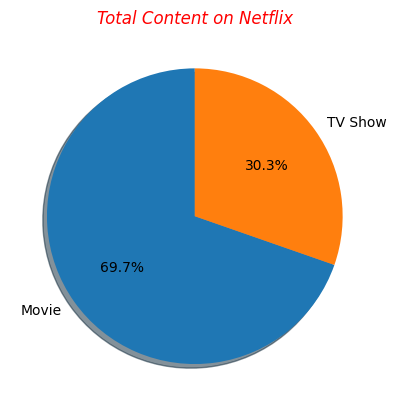

In [15]:
#Movies Vs TV Show
x=df.groupby('type')['release_year'].sum().sort_values(ascending=False)
plt.pie(x, labels=x.index,shadow=True, autopct='%0.1f%%',startangle=90)
plt.title('Total Content on Netflix',c='r',fontstyle='italic')
plt.show()

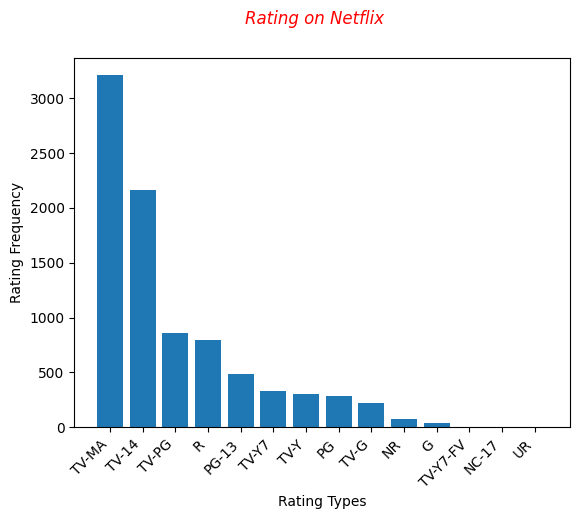

In [16]:
# The Ratings Based on Content Type
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', c='r', fontstyle='italic')
plt.show()

In [30]:
df['duration'].unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

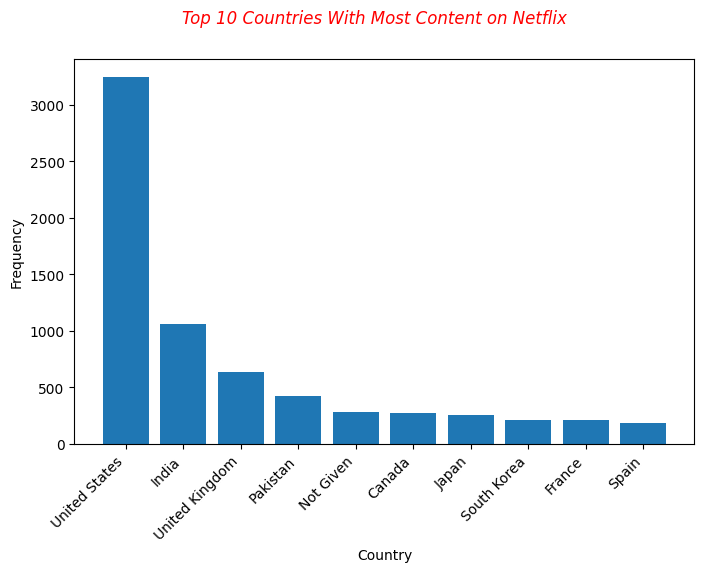

In [18]:
countries=df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(8,5))
plt.bar(countries['country'],countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 Countries With Most Content on Netflix",c='r',fontstyle='italic')
plt.show()

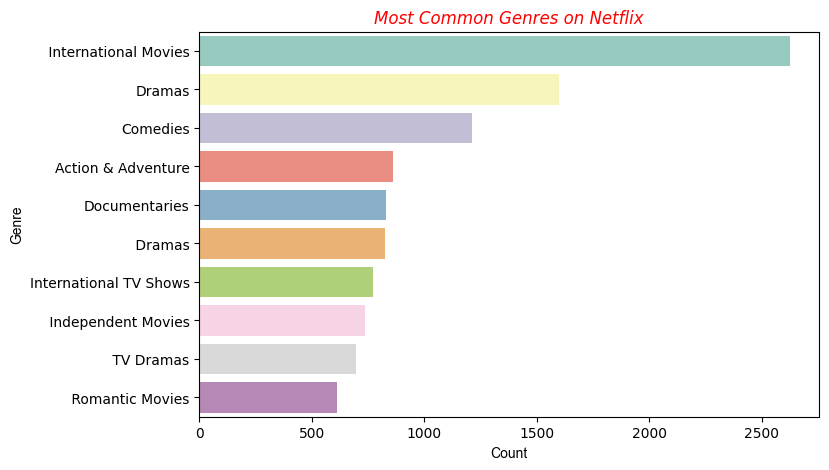

In [19]:
#Top Genre Movie
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts.values,y=genre_counts.index,hue=genre_counts.index, palette='Set3',legend=False)
plt.title('Most Common Genres on Netflix',c='r',fontstyle='italic')
plt.xlabel('Count',fontname='Arial')
plt.ylabel('Genre',fontname='Arial')
plt.show()

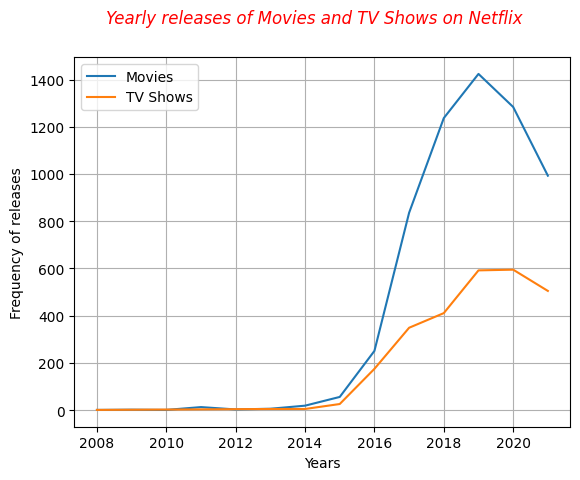

In [20]:
yearly_movie_releases=df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix",c='r',fontstyle='italic')
plt.legend()
plt.show()

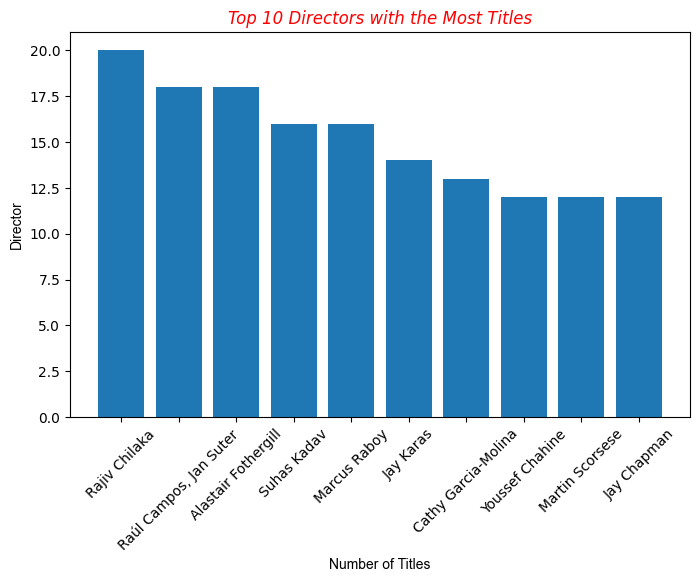

In [21]:
#top 10 directors with the most titles
top_directors = df['director'].value_counts().head(10)
top_directors = df[df['director'] != 'Not Given']['director'].value_counts().head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_directors.index, top_directors.values)
plt.title('Top 10 Directors with the Most Titles', color='red',fontstyle='italic')
plt.xlabel('Number of Titles', fontname='Arial')
plt.ylabel('Director', fontname='Arial')
plt.xticks(rotation=45)
plt.show()

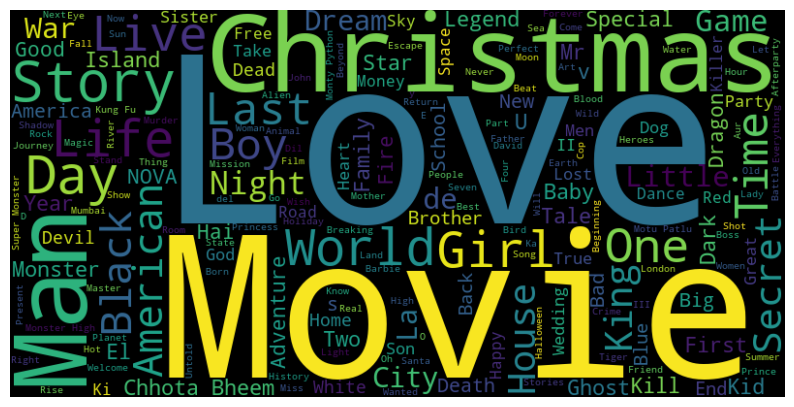

In [22]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusion

*1. From Past few years Netflix releases movies on high numbers as compare to TV shows*

*2. The top 3 Most Common Generes watch peoples are International Movies, Dramas and Comedies*

*3. After 2019 Netflix had a slight depriciation on uploading content*

*4. Top Uploaded Contents of Netflix is mostly consumed by United States, United Kingdom, India and Pakistan*

# Solution

*1. Maintain a regularity for uploading contents to Overcome loss screening*

*2. Must to Upload the content of best directors of respective geners high chances for audience to watch more films*

*3. Focus on uploading Movies as People loved to Watch them as compared to Tv Shows*                                                                    

In [23]:
df.to_csv('netflix1.csv', index=False)